<a href="https://colab.research.google.com/github/felipersteles/ModeloDeClassificacaoPrevisaodeChuvas/blob/main/DesafioDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [306]:
import warnings
warnings.filterwarnings('ignore')

#Importando bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [307]:
#Importando dados
main_dir = ''
from google.colab import drive
drive.mount('/content/drive')
main_dir = '/content/drive/MyDrive/Input/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [308]:
train = pd.read_csv(f'{main_dir}train.csv')
test = pd.read_csv(f'{main_dir}test.csv')

train.shape, test.shape

((113754, 24), (28439, 24))

In [309]:
train.head()

,Id,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
1,3,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
2,4,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
3,6,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
4,8,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No


In [310]:
test.head()

,Id,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,1,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,5,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
2,7,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,...,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
3,19,2008-12-19,Albury,11.2,22.5,10.6,NaN,NaN,SSE,43.0,...,47.0,32.0,1009.4,1009.7,NaN,2.0,15.5,21.0,Yes,No
4,25,2008-12-25,Albury,12.6,32.4,0.0,NaN,NaN,W,43.0,...,49.0,17.0,1012.9,1010.1,NaN,NaN,21.5,31.2,No,No


In [311]:
train.set_index('Date', inplace = True)
test.set_index('Date', inplace = True)

In [312]:
train.head()

,Id,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Date,,,,,,,,,,,,,,,,,,,,,
2008-12-02,2,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2008-12-03,3,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
2008-12-04,4,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
2008-12-06,6,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
2008-12-08,8,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No


In [313]:
print(train.describe().shape)
train.describe()
#16 numericas

(8, 17)


,Id,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,113754.000000,113256.000000,113503.000000,112608.000000,65254.000000,59667.000000,106359.000000,112672.000000,111660.000000,112352.000000,110888.000000,102599.000000,102609.000000,70956.000000,68250.000000,113048.000000,111592.000000
mean,72952.025889,12.193994,23.242170,2.343667,5.464482,7.621446,39.951382,13.991009,18.611598,68.811672,51.466615,1017.656712,1015.255720,4.425827,4.501143,17.002899,21.699564
std,42105.886140,6.412068,7.117963,8.461996,4.159501,3.784109,13.540804,8.871440,8.797325,19.065896,20.809812,7.102118,7.036794,2.887335,2.718758,6.501467,6.937262
min,2.000000,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,1.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000
25%,36291.000000,7.600000,18.000000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000
50%,73387.000000,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.700000,1015.300000,5.000000,5.000000,16.700000,21.100000
75%,109425.750000,16.900000,28.300000,0.600000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000
max,145459.000000,33.900000,48.100000,371.000000,86.200000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.200000


In [314]:
#fazendo descartes de atributos 
train.drop(['Id','MinTemp', 'MaxTemp','Sunshine' ,'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm','Pressure9am','Pressure3pm','Cloud9am', 'Cloud3pm','Temp9am', 'Temp3pm'], axis = 1, inplace = True)
test.drop(['Id','MinTemp', 'MaxTemp','Sunshine' ,'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm','Pressure9am','Pressure3pm','Cloud9am', 'Cloud3pm','Temp9am', 'Temp3pm'], axis = 1, inplace = True)

print(train.describe().shape)
train.describe()

(8, 3)


,Rainfall,Evaporation,WindGustSpeed
count,112608.000000,65254.000000,106359.000000
mean,2.343667,5.464482,39.951382
std,8.461996,4.159501,13.540804
min,0.000000,0.000000,6.000000
25%,0.000000,2.600000,31.000000
50%,0.000000,4.800000,39.000000
75%,0.600000,7.400000,48.000000
max,371.000000,86.200000,135.000000


In [315]:
#listando atributos numericos
num_vars = train.describe().columns.to_list()

# ou
num_vars = train.select_dtypes(exclude=['object']).columns.tolist()

print(f'#{len(num_vars)}: {num_vars}')

#3: ['Rainfall', 'Evaporation', 'WindGustSpeed']


In [316]:
#agora fazendo a descrição dos categoricos
print(train.describe(include=['O']).shape)
train.describe(include=['O']) #O de objet
#6 atributos

(4, 6)


,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,113754,106305,105778,110748,112608,113754
unique,49,16,16,16,2,2
top,Canberra,W,N,SE,No,No
freq,2742,7757,9085,8545,87512,88252


In [317]:
#fazendo descartes de atributos duplicados
train.drop(['WindDir9am','WindDir3pm'], axis = 1, inplace = True)
test.drop(['WindDir9am','WindDir3pm'], axis = 1, inplace = True)


print(train.describe(include=['O']).shape)
train.describe(include=['O']) #O de objet

(4, 4)


,Location,WindGustDir,RainToday,RainTomorrow
count,113754,106305,112608,113754
unique,49,16,2,2
top,Canberra,W,No,No
freq,2742,7757,87512,88252


In [318]:
train_vars = train.select_dtypes(include = ['object']).columns.tolist()

print(f'#{len(train_vars)}:{train_vars}',)

#4:['Location', 'WindGustDir', 'RainToday', 'RainTomorrow']


In [319]:
train.isnull().sum()

Location             0
Rainfall          1146
Evaporation      48500
WindGustDir       7449
WindGustSpeed     7395
RainToday         1146
RainTomorrow         0
dtype: int64

In [320]:
#Preencher categoricos com Moda
train['WindGustDir'].fillna(train['WindGustDir'].mode()[0], inplace=True)
train['RainToday'].fillna(train['RainToday'].mode()[0], inplace=True)

test['WindGustDir'].fillna(test['WindGustDir'].mode()[0], inplace=True)
test['RainToday'].fillna(test['RainToday'].mode()[0], inplace=True)

#Preencher numericos com Média
train['Rainfall'].fillna(train['Rainfall'].mean(), inplace=True)
train['Evaporation'].fillna(train['Evaporation'].mean(), inplace=True)
train['WindGustSpeed'].fillna(train['WindGustSpeed'].mean(), inplace=True)

test['Rainfall'].fillna(test['Rainfall'].mean(), inplace=True)
test['Evaporation'].fillna(test['Evaporation'].mean(), inplace=True)
test['WindGustSpeed'].fillna(test['WindGustSpeed'].mean(), inplace=True)

train.isnull().sum()

Location         0
Rainfall         0
Evaporation      0
WindGustDir      0
WindGustSpeed    0
RainToday        0
RainTomorrow     0
dtype: int64

In [321]:
train.head()

,Location,Rainfall,Evaporation,WindGustDir,WindGustSpeed,RainToday,RainTomorrow
Date,,,,,,,
2008-12-02,Albury,0.0,5.464482,WNW,44.0,No,No
2008-12-03,Albury,0.0,5.464482,WSW,46.0,No,No
2008-12-04,Albury,0.0,5.464482,NE,24.0,No,No
2008-12-06,Albury,0.2,5.464482,WNW,56.0,No,No
2008-12-08,Albury,0.0,5.464482,W,35.0,No,No


No     88252
Yes    25502
Name: RainTomorrow, dtype: int64
No     0.775814
Yes    0.224186
Name: RainTomorrow, dtype: float64


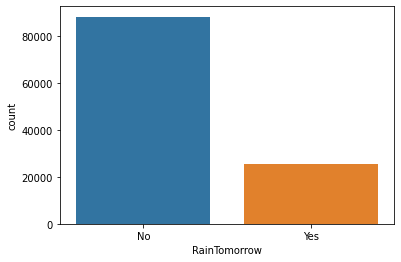

In [322]:
# choveu - Frequência / Frequência relativa
print(train['RainTomorrow'].value_counts())
print(train['RainTomorrow'].value_counts()/train['RainTomorrow'].count())

sns.countplot(train['RainTomorrow'],label = 'Count')

<Figure size 1872x432 with 0 Axes>

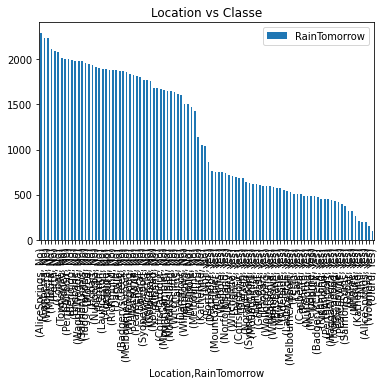

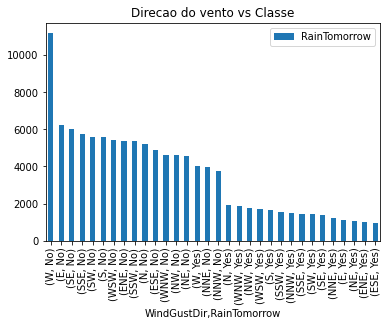

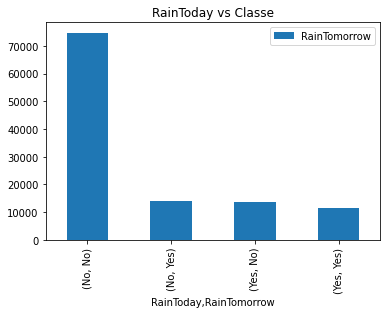

In [323]:
plt.figure(figsize=(26, 6))

df = pd.DataFrame(train.groupby(['Location'])['RainTomorrow'].value_counts().sort_values(ascending = False))
df.plot.bar()
plt.title('Location vs Classe')
plt.show()

df = pd.DataFrame(train.groupby(['WindGustDir'])['RainTomorrow'].value_counts().sort_values(ascending = False))
df.plot.bar()
plt.title('Direcao do vento vs Classe')
plt.show()

df = pd.DataFrame(train.groupby(['RainToday'])['RainTomorrow'].value_counts().sort_values(ascending = False))
df.plot.bar()
plt.title('RainToday vs Classe')
plt.show();

In [324]:
print(train[['WindGustDir', 'RainTomorrow']].groupby(['WindGustDir'])
.count().sort_values(by='RainTomorrow', ascending=False))

print(train[['Location', 'RainTomorrow']].groupby(['Location'])
.count().sort_values(by='RainTomorrow', ascending=False))

             RainTomorrow
WindGustDir              
W                   15206
SE                   7407
E                    7327
S                    7244
SSE                  7188
N                    7167
WSW                  7096
SW                   7046
SSW                  6910
WNW                  6473
ENE                  6412
NW                   6381
ESE                  5805
NE                   5635
NNW                  5274
NNE                  5183
                  RainTomorrow
Location                      
Canberra                  2742
Sydney                    2702
Perth                     2598
Darwin                    2560
Brisbane                  2552
Hobart                    2533
AliceSprings              2492
PerthAirport              2453
Adelaide                  2448
Bendigo                   2445
Launceston                2436
Townsville                2435
Wollongong                2431
WaggaWagga                2417
Ballarat                  2416
Watso

In [325]:
train.head()

,Location,Rainfall,Evaporation,WindGustDir,WindGustSpeed,RainToday,RainTomorrow
Date,,,,,,,
2008-12-02,Albury,0.0,5.464482,WNW,44.0,No,No
2008-12-03,Albury,0.0,5.464482,WSW,46.0,No,No
2008-12-04,Albury,0.0,5.464482,NE,24.0,No,No
2008-12-06,Albury,0.2,5.464482,WNW,56.0,No,No
2008-12-08,Albury,0.0,5.464482,W,35.0,No,No


In [326]:
#Listando variaveis
cat_vars = train.select_dtypes(include=['object']).columns.tolist()
num_vars = train.select_dtypes(exclude=['object']).columns.tolist()

cat_vars, num_vars

(['Location', 'WindGustDir', 'RainToday', 'RainTomorrow'],
 ['Rainfall', 'Evaporation', 'WindGustSpeed'])

In [327]:
def show_unique(x,df):
  print(f'{x} {df[x].unique()}')

for x in cat_vars:
  show_unique(x,train)

Location ['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']
WindGustDir ['WNW' 'WSW' 'NE' 'W' 'NNW' 'N' 'NNE' 'SW' 'ENE' 'SSE' 'S' 'NW' 'SE' 'ESE'
 'E' 'SSW']
RainToday ['No' 'Yes']
RainTomorrow ['No' 'Yes']


In [328]:
#transformando em variaveis dummys
train = pd.get_dummies(train, columns=['Location', 'WindGustDir','RainToday'], drop_first=True)
test = pd.get_dummies(test, columns=['Location', 'WindGustDir','RainToday'], drop_first=True)

#transformando raintomorrow em int
train['RainTomorrow'] = train['RainTomorrow'].map({'Yes':1 ,'No':0})
test['RainTomorrow'] = test['RainTomorrow'].map({'Yes':1 ,'No':0})



train.columns

Index(['Rainfall', 'Evaporation', 'WindGustSpeed', 'RainTomorrow',
       'Location_Albany', 'Location_Albury', 'Location_AliceSprings',
       'Location_BadgerysCreek', 'Location_Ballarat', 'Location_Bendigo',
       'Location_Brisbane', 'Location_Cairns', 'Location_Canberra',
       'Location_Cobar', 'Location_CoffsHarbour', 'Location_Dartmoor',
       'Location_Darwin', 'Location_GoldCoast', 'Location_Hobart',
       'Location_Katherine', 'Location_Launceston', 'Location_Melbourne',
       'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree',
       'Location_MountGambier', 'Location_MountGinini', 'Location_Newcastle',
       'Location_Nhil', 'Location_NorahHead', 'Location_NorfolkIsland',
       'Location_Nuriootpa', 'Location_PearceRAAF', 'Location_Penrith',
       'Location_Perth', 'Location_PerthAirport', 'Location_Portland',
       'Location_Richmond', 'Location_Sale', 'Location_SalmonGums',
       'Location_Sydney', 'Location_SydneyAirport', 'Location_Townsville',

In [329]:
test.columns

Index(['Rainfall', 'Evaporation', 'WindGustSpeed', 'RainTomorrow',
       'Location_Albany', 'Location_Albury', 'Location_AliceSprings',
       'Location_BadgerysCreek', 'Location_Ballarat', 'Location_Bendigo',
       'Location_Brisbane', 'Location_Cairns', 'Location_Canberra',
       'Location_Cobar', 'Location_CoffsHarbour', 'Location_Dartmoor',
       'Location_Darwin', 'Location_GoldCoast', 'Location_Hobart',
       'Location_Katherine', 'Location_Launceston', 'Location_Melbourne',
       'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree',
       'Location_MountGambier', 'Location_MountGinini', 'Location_Newcastle',
       'Location_Nhil', 'Location_NorahHead', 'Location_NorfolkIsland',
       'Location_Nuriootpa', 'Location_PearceRAAF', 'Location_Penrith',
       'Location_Perth', 'Location_PerthAirport', 'Location_Portland',
       'Location_Richmond', 'Location_Sale', 'Location_SalmonGums',
       'Location_Sydney', 'Location_SydneyAirport', 'Location_Townsville',

In [330]:
x_train = train.drop('RainTomorrow',axis = 1)
y_train = train['RainTomorrow']
x_train.shape, y_train.shape

((113754, 67), (113754,))

In [331]:
x_test = test.drop('RainTomorrow',axis = 1)
y_test = test['RainTomorrow']
x_test.shape, y_test.shape

((28439, 67), (28439,))

#### MODELO 1 - Houdout

In [332]:
import xgboost as xgb

model = xgb.XGBClassifier()

#treinar modelo
model.fit(x_train, y_train)
# gerar predicao
y_pred = model.predict(x_test)


In [335]:
from sklearn.preprocessing import MinMaxScaler

features_list = x_train.columns.to_list()

scaler = MinMaxScaler()

x_train[features_list] = scaler.fit_transform(x_train[features_list])
x_test[features_list] = scaler.transform(x_test[features_list])
x_train.describe()

,Rainfall,Evaporation,WindGustSpeed,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,...,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,RainToday_Yes
count,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,...,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000
mean,0.006317,0.063393,0.263189,0.021168,0.020799,0.021907,0.020579,0.021239,0.021494,0.022434,...,0.056095,0.063681,0.065114,0.063189,0.060745,0.061941,0.133674,0.056903,0.062380,0.220616
std,0.022693,0.036547,0.101498,0.143946,0.142712,0.146380,0.141972,0.144180,0.145024,0.148092,...,0.230106,0.244185,0.246728,0.243304,0.238863,0.241049,0.340304,0.231659,0.241846,0.414664
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.046404,0.193798,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.063393,0.255814,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.002156,0.063393,0.310078,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [336]:
from sklearn.metrics import (recall_score, accuracy_score, precision_score, f1_score, roc_auc_score)

def show_metrics(model, x_test, y_test,y_pred):
    metrics = {
        'recall': recall_score(y_test,y_pred),
        'accuracy': accuracy_score(y_test,y_pred),
        'precision': precision_score(y_test,y_pred),
        'F1': f1_score(y_test,y_pred),
        'roc_auc': roc_auc_score(y_test, model.predict_proba(x_test)[:, 1])
    }
    print(pd.DataFrame.from_dict(metrics, orient='index',columns=['Metrics']))

show_metrics(model, x_test, y_test, y_pred)

            Metrics
recall     0.249412
accuracy   0.802314
precision  0.655130
F1         0.361282
roc_auc    0.604351


#### MODELO 2 - Validação Cruzada _(Cross-Validation)_

In [347]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_validate, cross_val_predict

folds = 50

kfold = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 123)

model = xgb.XGBClassifier(objective="binary:logistic")

In [ ]:
x_train[x_train.columns] = scaler.fit_transform(x_train[x_train.columns])

# cv_result = cross_val_score(model, x_train, y, cv=kfold, scoring='roc_auc', verbose=0)
cv_result = cross_validate(model, x_train, y_train, cv=kfold, scoring=['recall','accuracy', 'precision', 'f1_macro', 'roc_auc'], verbose=0)
cv_result

In [ ]:
def show_cv_metrics(str, cv_result):
    print('{}: {:.4f} +/- {:.4f}'.format(str, cv_result[str].mean(), cv_result[str].std()))

show_cv_metrics('test_recall', cv_result)
show_cv_metrics('test_accuracy', cv_result)
show_cv_metrics('test_precision', cv_result)
show_cv_metrics('test_f1_macro', cv_result)
show_cv_metrics('test_roc_auc', cv_result)